## Scientific Computing with Python: Getting familiar with machine learning with ```sklearn```

### Exercise 1: Use Machine Learning in `scikit-learn` to do a Binary Classification

Binary Classifications are classifications with only two classes as targets: True/False, Positive/Negative, Malignant/Benign, etc. 

We have loaded the <b>Breast cancer wisconsin (diagnostic) dataset</b> from ```scikit-learn``` as a good example. This dataset is more intereting than Iris from a Machine Learning perspective, as it has a binary class output of malignant/benign and a decent number of patients and features for us to work with.

Following convention, **Features** and **Targets** are stored in the variables `X` and `y`, respectively. You will use these as inputs/outputs for your ML model. We will do some <b>data visualization</b>: a critical step in ML to determine if classes even exist in your high dimensional data. Finally, we do proper train/test splitting to test how good your model performs in predicting malignant/benign.

In [1]:
from sklearn.datasets import load_breast_cancer

# load the data
dataset = load_breast_cancer(as_frame=True)

X = dataset['data']
y = dataset['target']

display(X.head())
display(y.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

#### Exercise 1.1: Visualize the data using Dimensionality Reduction

Data visualization is critical to determining how to move forward in any machine learning task. However, high-dimensional data like we have here is difficult, if not impossible, to visualize. 

Below we have taken our high-dimensional data and reduced it to 2-dimensions using <a href="https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html">Principle Component Analysis (PCA)</a>. If we plot the result and label based on our known targets, we can see if two groups exist within the data or not. Run the code: does it look like a nice binary classification problem, or not?

PCA is kind of outdated, and isn't the best method for visualizing clusters. A more modern technique is <a href="https://scikit-learn.org/0.16/modules/generated/sklearn.manifold.TSNE.html">t-distributed Stochastic Neighbor Embedding (tSNE)</a>.

Implement tSNE to reduce the data to 2-dimensions. How does our outlook for binary classification look now?

#### Do you think there exists, somewhere in your data, two distinct classes that an ML model can suss out?

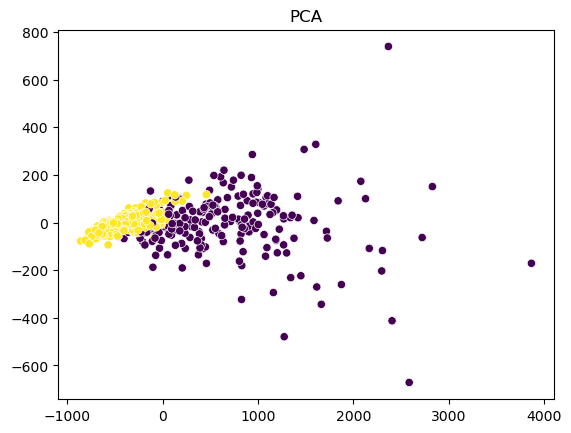

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for n_components=2 on X
# store the result in small x

x_pca = PCA(n_components=2).fit_transform(X)

# plotting our data. Is there class separation?
try:
    sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], markers='.', c=y)
    plt.title("PCA")
except TypeError:
    pass

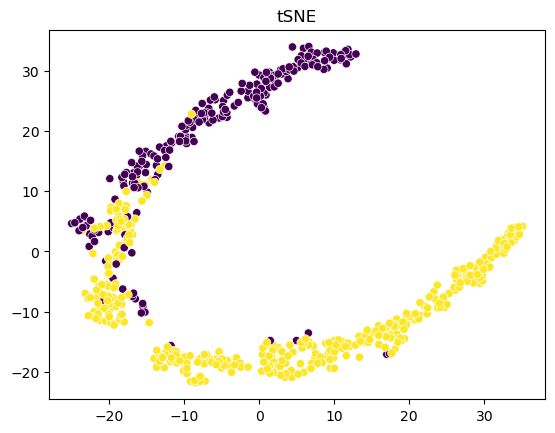

In [3]:
from sklearn.manifold import TSNE

# Perform tSNE on our data using X with n_components=2 and perplexity=30.0
# store the result in x_tsne

x_tsne = TSNE(n_components=2, perplexity=30.0).fit_transform(X)

# plotting our data. Is there class separation now?
# what if you change the perplexity?
try:
    plt.figure()
    sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], markers='.', c=y)
    plt.title("tSNE")
except TypeError:
    pass

#### Exercise 1.2: Perform a Train/Test Split of your Data

A critical preparation step for supervised machine learning, Train/Test splitting allows us to reserve a "hold-out" Test set which our model will not be trained on. This allows us to determine if our model is <b>overfitting</b> or learning the training dataset too well, preventing it from generalizing to new, unseen data.

<b>Train/Test split at a ratio of 80/20.</b>

In [4]:
from sklearn.model_selection import train_test_split

# use the imported function to do the train/test split here
try:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

except TypeError:
    pass
else:
    # Afterwards, we apply data normalization so it will work with our ML model
    from sklearn.preprocessing import StandardScaler

    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

#### Exercise 1.3: Fit a Binary Classification model to your Data, and make predictions.

We will now "fit" our data to a binary classification model. For convenience, we have selected an appropriate model which you may recognize from the slides. However, you don't have to use this one if you think there may be a better one! As always, [dig into the docs](https://scikit-learn.org/1.5/supervised_learning.html)!

Begin by creating your model, which is a class `LogisticRegression`, and then call the `.fit` and `.predict` methods respectively. Refer to the slides for an example of how to do this.

In [5]:
from sklearn.linear_model import LogisticRegression

# create the model and run model.fit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# make predictions y_pred using model.predict
y_pred = model.predict(X_test)

#### Exercise 1.4: Evaluate your model performance. How did it do?

You can fit any model to any dataset, but it doesn't mean that it will make correct predictions. That is why we made our "hold-out" set, (`X_test`, `y_test`).

For binary classifications, you can use something called a [confusion matrix](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html). It compares the predicted binary values to the true binary values. The diagonals of the matrix will thus be True Negatives and True Positives, and the anti-diagonals will be False Negatives and False Positives ([more info](https://en.wikipedia.org/wiki/Confusion_matrix)). A good model will have very high values on the diagonals, and very low values on the off-diagonals.

Create the `confusion_matrix` using the imported function, and plot it using `seaborn.heatmap`. What do you see?

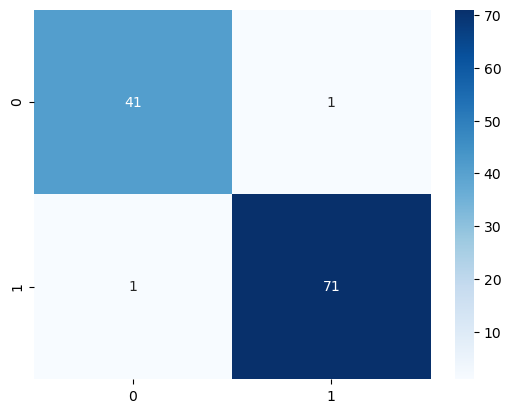

In [7]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot using heatmap
try:
    heatmap(cm, annot=True, cmap='Blues', fmt='g')
except ValueError:
    pass